In [1]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00


In [13]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.factors import factor_product
import networkx as nx
import matplotlib.pyplot as plt

Q2

In [14]:
model = BayesianNetwork()
model.add_nodes_from(['A','B','T','S','L','E','D','X'])

In [15]:
model.nodes()

NodeView(('A', 'B', 'T', 'S', 'L', 'E', 'D', 'X'))

In [16]:
model.add_edges_from([('A','T'),('S','L'),('S','B'),('T','E'),('L','E'),('E','D'),('B','D'),('E','X')])

In [17]:
model.edges()

OutEdgeView([('A', 'T'), ('B', 'D'), ('T', 'E'), ('S', 'L'), ('S', 'B'), ('L', 'E'), ('E', 'D'), ('E', 'X')])

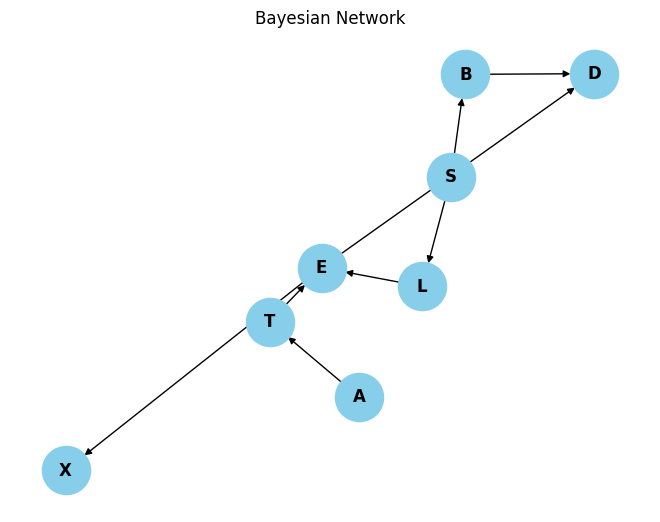

In [18]:
graph = nx.DiGraph()
graph.add_edges_from(model.edges())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1200, node_color="skyblue", font_weight="bold", font_size=12, arrows=True)
plt.title("Bayesian Network")
plt.show()

In [19]:
# Q2 IV
model.get_independencies()

(D ⟂ X | E)
(D ⟂ A | T)
(D ⟂ X, T, A, L | S, E)
(D ⟂ A | S, T)
(D ⟂ X, A | E, T)
(D ⟂ T, S, X, A, L | B, E)
(D ⟂ X | E, A)
(D ⟂ X, T, A | E, L)
(D ⟂ A | B, T)
(D ⟂ A | X, T)
(D ⟂ A | T, L)
(D ⟂ S | B, L)
(D ⟂ X, A, L | S, E, T)
(D ⟂ X, T, A, L | S, E, B)
(D ⟂ T, A, L | S, X, E)
(D ⟂ X, T, L | S, E, A)
(D ⟂ X, T, A | S, E, L)
(D ⟂ A | S, T, B)
(D ⟂ A | S, X, T)
(D ⟂ A | S, T, L)
(D ⟂ S, X, A, L | B, E, T)
(D ⟂ A | X, E, T)
(D ⟂ X | E, T, A)
(D ⟂ X, A | E, T, L)
(D ⟂ S, T, A, L | B, X, E)
(D ⟂ S, X, T, L | B, E, A)
(D ⟂ S, X, T, A | B, E, L)
(D ⟂ T, A | X, E, L)
(D ⟂ X, T | E, A, L)
(D ⟂ A | B, X, T)
(D ⟂ S, A | B, T, L)
(D ⟂ A | X, T, L)
(D ⟂ S | B, X, L)
(D ⟂ S | B, A, L)
(D ⟂ X, A, L | S, E, T, B)
(D ⟂ A, L | S, X, E, T)
(D ⟂ X, L | S, E, T, A)
(D ⟂ X, A | S, E, T, L)
(D ⟂ T, A, L | S, X, E, B)
(D ⟂ X, T, L | S, E, A, B)
(D ⟂ X, T, A | S, L, E, B)
(D ⟂ T, L | S, X, E, A)
(D ⟂ T, A | S, X, E, L)
(D ⟂ X, T | S, E, A, L)
(D ⟂ A | S, X, T, B)
(D ⟂ A | S, L, T, B)
(D ⟂ A | S, X, T, L)
(D ⟂

In [20]:
cpd_A = TabularCPD('A', 2, [[0.99], [0.01]])
cpd_S = TabularCPD('S', 2, [[0.5], [0.5]])
cpd_T = TabularCPD('T', 2, [[0.99, 0.95], [0.01, 0.05]], evidence = ['A'], evidence_card = [2])
cpd_L = TabularCPD('L', 2, [[0.99, 0.9], [0.01, 0.1]], evidence = ['S'], evidence_card = [2])
cpd_B = TabularCPD('B', 2, [[0.7, 0.4], [0.3, 0.6]], evidence =['S'], evidence_card = [2])
cpd_E = TabularCPD('E', 2,[[1, 0, 0, 0],[0, 1, 1, 1]],evidence=['T', 'L'],evidence_card=[2, 2])
cpd_D = TabularCPD('D', 2,[[0.9, 0.3, 0.2, 0.1],[0.1, 0.7, 0.8, 0.9]],evidence=['B', 'E'],evidence_card=[2, 2])
cpd_X = TabularCPD('X', 2, [[0.95, 0.02], [0.05, 0.98]], evidence = ['E'], evidence_card = [2])

In [21]:
model.add_cpds(cpd_A, cpd_S, cpd_T, cpd_L, cpd_B, cpd_E, cpd_D, cpd_X)
model.get_cpds()

[<TabularCPD representing P(A:2) at 0x79217484a920>,
 <TabularCPD representing P(S:2) at 0x79217548a890>,
 <TabularCPD representing P(T:2 | A:2) at 0x7921754886a0>,
 <TabularCPD representing P(L:2 | S:2) at 0x792175488280>,
 <TabularCPD representing P(B:2 | S:2) at 0x79217548a770>,
 <TabularCPD representing P(E:2 | T:2, L:2) at 0x79217484bfa0>,
 <TabularCPD representing P(D:2 | B:2, E:2) at 0x79217484a8c0>,
 <TabularCPD representing P(X:2 | E:2) at 0x79217484bfd0>]

In [22]:
model.check_model()

True

In [23]:
model.nodes()

NodeView(('A', 'B', 'T', 'S', 'L', 'E', 'D', 'X'))

In [24]:
model.edges()

OutEdgeView([('A', 'T'), ('B', 'D'), ('T', 'E'), ('S', 'L'), ('S', 'B'), ('L', 'E'), ('E', 'D'), ('E', 'X')])

In [25]:
# Q2 III
inference = VariableElimination(model)
result = inference.query(variables=['D'], evidence={'X': 1})
print(result)

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.3592 |
+------+----------+
| D(1) |   0.6408 |
+------+----------+


In [ ]:
result = inference.query(variables=['X'])
print(result)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.8897 |
+------+----------+
| X(1) |   0.1103 |
+------+----------+


In [ ]:
result = inference.query(variables = ['T'], evidence = {'A': 1, 'L': 1, 'X': 1})
print(result)

+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.9500 |
+------+----------+
| T(1) |   0.0500 |
+------+----------+


Q1

In [32]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.factors import factor_product
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
model = BayesianNetwork()

In [34]:
model.add_nodes_from(['Income','Deposit', 'Payment','Security','Housing'])
model.add_edges_from([['Income','Payment'],['Income','Deposit'],['Deposit','Payment'],['Payment','Security'],['Housing','Security']])
print(model.nodes)
print(model.edges)

['Income', 'Deposit', 'Payment', 'Security', 'Housing']
[('Income', 'Payment'), ('Income', 'Deposit'), ('Deposit', 'Payment'), ('Payment', 'Security'), ('Housing', 'Security')]


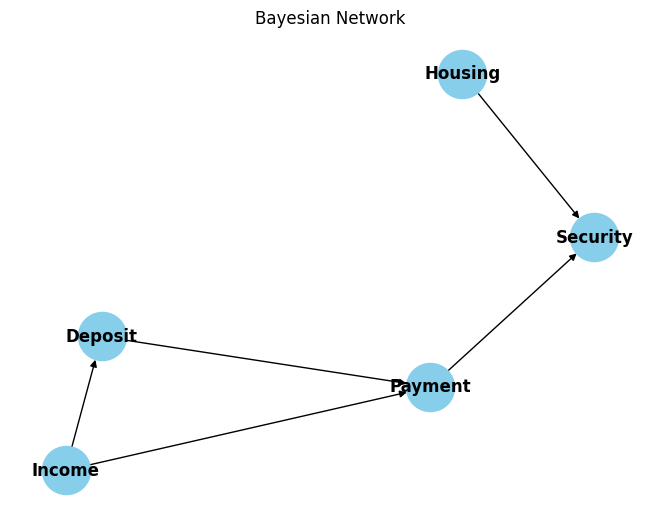

In [35]:
graph = nx.DiGraph()
graph.add_edges_from(model.edges())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1200, node_color="skyblue", font_weight="bold", font_size=12, arrows=True)
plt.title("Bayesian Network")
plt.show()

In [44]:
model.get_children('Deposit'),model.get_children('Payment')

(['Payment'], ['Security'])

In [36]:
model.get_independencies()

(Deposit ⟂ Housing)
(Deposit ⟂ Housing | Income)
(Deposit ⟂ Housing, Security | Payment)
(Deposit ⟂ Housing, Security | Income, Payment)
(Deposit ⟂ Security | Housing, Payment)
(Deposit ⟂ Housing | Payment, Security)
(Deposit ⟂ Security | Income, Housing, Payment)
(Deposit ⟂ Housing | Income, Payment, Security)
(Housing ⟂ Income, Deposit, Payment)
(Housing ⟂ Deposit, Payment | Income)
(Housing ⟂ Income, Payment | Deposit)
(Housing ⟂ Income, Deposit | Payment)
(Housing ⟂ Payment | Income, Deposit)
(Housing ⟂ Deposit | Income, Payment)
(Housing ⟂ Income | Deposit, Payment)
(Housing ⟂ Income, Deposit | Payment, Security)
(Housing ⟂ Deposit | Income, Payment, Security)
(Housing ⟂ Income | Deposit, Payment, Security)
(Income ⟂ Housing)
(Income ⟂ Housing | Deposit)
(Income ⟂ Housing, Security | Payment)
(Income ⟂ Housing, Security | Deposit, Payment)
(Income ⟂ Security | Housing, Payment)
(Income ⟂ Housing | Payment, Security)
(Income ⟂ Security | Deposit, Housing, Payment)
(Income ⟂ Housing

In [49]:
cpd_A = TabularCPD('Income', 2, [[0.7], [0.3]])
cpd_B = TabularCPD('Deposit', 2, [[0.4, 0.9], [0.6, 0.1]], evidence = ['Income'], evidence_card = [2])
cpd_C = TabularCPD('Payment', 2,[[0.4, 0.55, 0.5, 0.95],[0.6, 0.45, 0.5, 0.05]],evidence=['Income', 'Deposit'],evidence_card=[2, 2])
cpd_D = TabularCPD('Security', 2,[[0.69, 0.25, 0.5, 0.99],[0.31, 0.75, 0.5, 0.01]],evidence=['Payment','Housing'],evidence_card=[2, 2])
cpd_E = TabularCPD('Housing', 2, [[0.65], [0.35]])

In [50]:
model.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D, cpd_E)

In [11]:
# all_cpds = model.get_cpds()
# all_factors = [cpd.to_factor() for cpd in all_cpds]
# print(all_factors)

[<DiscreteFactor representing phi(A:2) at 0x79217551fb50>, <DiscreteFactor representing phi(B:2, A:2) at 0x79217548a860>, <DiscreteFactor representing phi(C:2, A:2, B:2) at 0x7921754881f0>, <DiscreteFactor representing phi(D:2, C:2, E:2) at 0x792175488400>, <DiscreteFactor representing phi(E:2) at 0x7921754d5db0>]


In [51]:
all_cpds = model.get_cpds()
all_factors = [cpd.to_factor() for cpd in all_cpds]
joint_distribution = factor_product(*all_factors)
print(joint_distribution)

+------------+------------+-----------+------------+-------------+------------------------------------------------+
| Deposit    | Housing    | Income    | Payment    | Security    |   phi(Deposit,Housing,Income,Payment,Security) |
+============+============+===========+============+=============+================================================+
| Deposit(0) | Housing(0) | Income(0) | Payment(0) | Security(0) |                                         0.0502 |
+------------+------------+-----------+------------+-------------+------------------------------------------------+
| Deposit(0) | Housing(0) | Income(0) | Payment(0) | Security(1) |                                         0.0226 |
+------------+------------+-----------+------------+-------------+------------------------------------------------+
| Deposit(0) | Housing(0) | Income(0) | Payment(1) | Security(0) |                                         0.0546 |
+------------+------------+-----------+------------+-------------+------

In [53]:
# Q1 IV
inference = VariableElimination(model)
result = inference.query(variables=['Payment'])
print(result)

+------------+----------------+
| Payment    |   phi(Payment) |
+============+================+
| Payment(0) |         0.5065 |
+------------+----------------+
| Payment(1) |         0.4935 |
+------------+----------------+


In [55]:
# Q1 V
result = inference.query(variables=['Payment'], evidence = {'Income':0, 'Deposit': 1})
print(result)

+------------+----------------+
| Payment    |   phi(Payment) |
+============+================+
| Payment(0) |         0.5500 |
+------------+----------------+
| Payment(1) |         0.4500 |
+------------+----------------+


In [56]:
# Q1 VI
result = inference.query(variables=['Payment'], evidence = {'Income': 1, 'Security': 0})
print(result)

+------------+----------------+
| Payment    |   phi(Payment) |
+============+================+
| Payment(0) |         0.4888 |
+------------+----------------+
| Payment(1) |         0.5112 |
+------------+----------------+
